In [1]:
import pandas as pd

In [2]:
from pyprojroot import here

In [6]:
df_bioc = pd.read_csv(here() / "data/df_bioc.csv", index_col=0).set_index('miRNA')

df_bioc.columns

Index(['forward_mut', 'frac_avg', 'cut_ratio_log2', 'replicate', 'lowCounts_y',
       'outlier_y', 'seq', 'fiveEnd', 'threeEnd', 'callCategory',
       ...
       'seq_168_U', 'seq_169_A', 'seq_169_C', 'seq_169_G', 'seq_169_U',
       'seq_170_A', 'seq_170_C', 'seq_170_G', 'seq_170_U', 'basename'],
      dtype='object', length=1213)

In [19]:
df_vari = pd.read_csv(here() / "data/df_vari.csv", index_col=0).set_index('miRNA')

In [45]:
from scipy.special import logit
import janitor

combined_df = pd.concat([df_bioc, df_vari]).query("frac_avg < 1").query("frac_avg > 0").transform_column("frac_avg", logit, "logit")

In [46]:
seq_columns = [c for c in df_bioc.columns if "seq_" in c]
entropy_columns = [c for c in df_bioc.columns if "shannon_" in c]
bp_columns = [c for c in df_bioc.columns if "bp_" in c]
cut_columns = [c for c in df_bioc.columns if "cut_" in c]

## Clean function

In [47]:
import janitor

def remove_long_cols(df):
    seq_columns = [c for c in df_bioc.columns if "seq_" in c]
    entropy_columns = [c for c in df_bioc.columns if "shannon_" in c]
    bp_columns = [c for c in df_bioc.columns if "bp_" in c]
    cut_columns = [c for c in df_bioc.columns if "cut_" in c]
    return df.select_columns(seq_columns, invert=True).select_columns(entropy_columns, invert=True).select_columns(bp_columns, invert=True).select_columns(cut_columns, invert=True)

smaller_df = combined_df.pipe(remove_long_cols)
smaller_df.to_csv(here() / "data/combined.csv")

## Pre-computed featurizations

In [48]:
entropy = combined_df.select_columns(entropy_columns)
entropy.to_csv(here() / "data/entropy.csv")

In [49]:
onehot = combined_df.select_columns(seq_columns)
onehot.to_csv(here() / "data/onehot.csv")

In [50]:
bp = combined_df.select_columns(bp_columns)
bp.to_csv(here() / "data/bp.csv")

In [51]:
cut = combined_df.select_columns(cut_columns)
cut.to_csv(here() / "data/cut.csv")

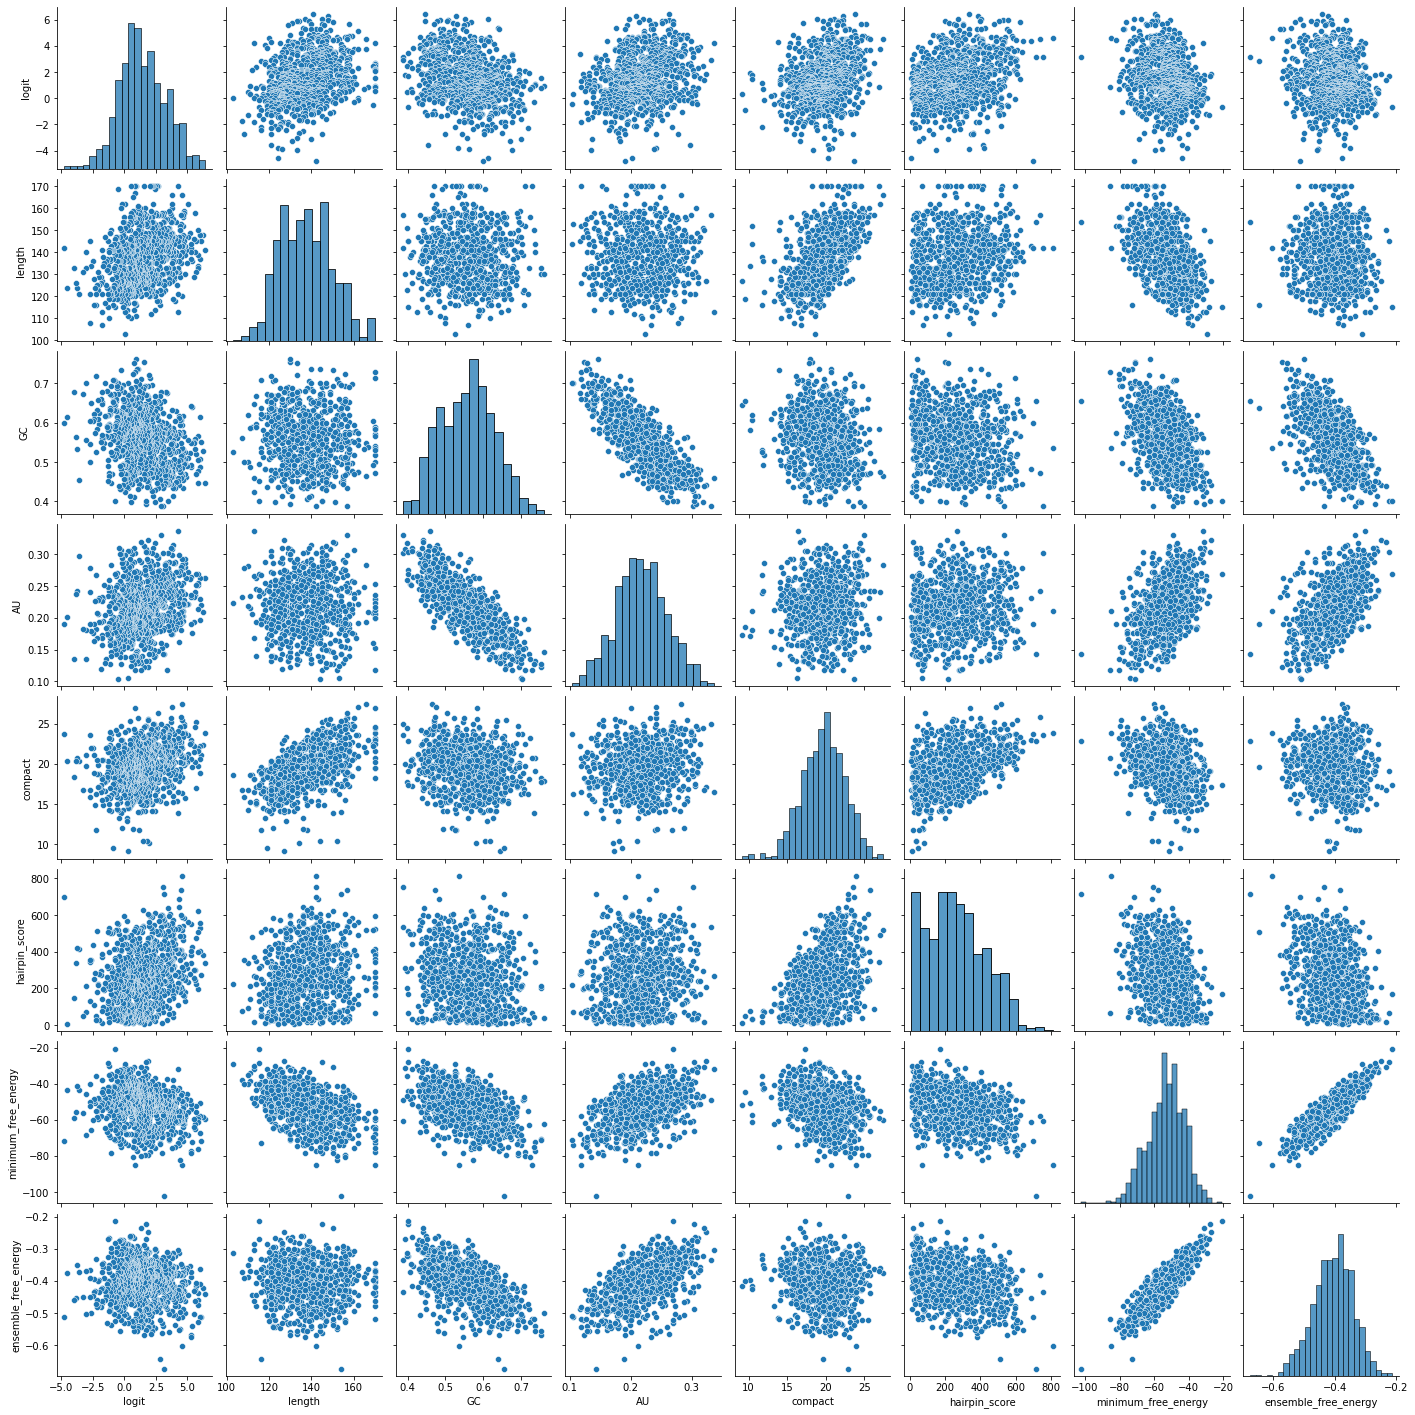

In [57]:
import seaborn as sns
sns.pairplot(
    smaller_df
    .query("replicate == 'biochem'")
    .select_columns(
        [
            "logit", "length", "GC", "AU", "compact", 
            "hairpin_score", "minimum_free_energy", "ensemble_free_energy"
        ]
    )
)

In [54]:
smaller_df.columns

Index(['forward_mut', 'frac_avg', 'replicate', 'lowCounts_y', 'outlier_y',
       'seq', 'fiveEnd', 'threeEnd', 'callCategory', 'length', 'name', 'GC',
       'AU', 'UG', 'UGU', 'CNNC', 'dot_bracket', 'compact', 'hairpin_score',
       'minimum_free_energy', 'ensemble_free_energy', 'basename', 'logit'],
      dtype='object')